In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import glacierml as gl
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.cluster import KMeans
import seaborn as sns
pd.set_option('display.max_columns', None)


        
# RGI.to_csv('Farinotti_mean_thickness_RGI_ID.csv')


In [39]:
pth_2 = '/home/simonhans/data/prethicktor/RGI/rgi60-attribs/'
# pth_2 = '/data/fast1/glacierml/data/RGI/rgi60-attribs/'
RGI_extra = pd.DataFrame(columns = ['Farinotti Mean Thickness'])
for file in tqdm(os.listdir(pth_2)):
    file_reader = pd.read_csv(pth_2 + file, encoding_errors = 'replace', on_bad_lines = 'skip')
    RGI_extra = pd.concat([RGI_extra, file_reader], ignore_index = True)

    # select only RGI data that was used to train the model   
RGI = RGI_extra[[
    'RGIId',
    'Farinotti Mean Thickness'
]]
print(RGI)

100%|██████████| 19/19 [00:01<00:00, 16.32it/s]

                 RGIId Farinotti Mean Thickness
0       RGI60-16.00001                      NaN
1       RGI60-16.00002                      NaN
2       RGI60-16.00003                      NaN
3       RGI60-16.00004                      NaN
4       RGI60-16.00005                      NaN
...                ...                      ...
216496  RGI60-08.03413                      NaN
216497  RGI60-08.03414                      NaN
216498  RGI60-08.03415                      NaN
216499  RGI60-08.03416                      NaN
216500  RGI60-08.03417                      NaN

[216501 rows x 2 columns]


In [44]:

# print(RGI['RGIId'])

pth_1 = '/home/simonhans/data/prethicktor/RGI/results_model_1/'


for region_number in range(1,20,1):

# region_list = (7, 8, 11, 13, 14, 15, 18)
# for region_number in region_list:
    RGI_extra = pd.DataFrame(columns = ['Farinotti Mean Thickness'])

#     print(RGI)
    if len(str(region_number)) == 1:
        N = 1
        region_number = str(region_number).zfill(N + len(str(region_number)))
    else:
        str(region_number) == str(region_number)
    print(region_number)
    region_folder = pth_1 + 'RGI60-' + str(region_number) + '/'
    for file in tqdm(os.listdir(region_folder)):
        im = Image.open(region_folder + file)
        imarray = np.array(im)
        part_1 = file[10:]
        rgi_name = part_1[:-4]
        print(rgi_name)
#         im.show()
        df = pd.DataFrame(imarray)
        df = df.replace(0.0, np.nan)
#         print(file)
#         print(df)
        mean_glacier_thickness =  np.nanmean(np.nanmean(df.to_numpy()))
#         print(mean_glacier_thickness)
        RGI['Farinotti Mean Thickness'].loc[RGI['RGIId'] == rgi_name] = mean_glacier_thickness
        break
    break
#     RGI.to_csv('reference_thicknesses/results_2_mean_thicknesses.csv')


07


  0%|          | 0/1615 [00:00<?, ?it/s]

RGI60-07.00531


In [65]:
df1= pd.read_csv('reference_thicknesses/results_1_mean_thicknesses.csv')
df1 = df1.drop('Unnamed: 0', axis = 1)
# df1.min()
df1 = df1.dropna()
df1

,RGIId,Farinotti Mean Thickness
0,RGI60-16.00001,14.887354
1,RGI60-16.00002,12.423385
2,RGI60-16.00003,13.260069
3,RGI60-16.00004,12.137024
4,RGI60-16.00005,13.074893
...,...,...
216496,RGI60-08.03413,12.021202
216497,RGI60-08.03414,33.596200
216498,RGI60-08.03415,12.900301
216499,RGI60-08.03416,162.679170


In [66]:
RGI = gl.RGI_loader(
    pth = '/home/simonhans/data/prethicktor/RGI/rgi60-attribs/'
)

RGI = RGI.sort_values('RGIId')
RGI

,RGIId,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax
167121,RGI60-01.00001,63.6890,-146.8230,42.0,1936,2385,2725,0.360,346,839
167122,RGI60-01.00002,63.4040,-146.6680,16.0,1713,2005,2144,0.558,162,1197
167123,RGI60-01.00003,63.3760,-146.0800,18.0,1609,1868,2182,1.685,175,2106
167124,RGI60-01.00004,63.3810,-146.1200,19.0,1273,1944,2317,3.681,195,4175
167125,RGI60-01.00005,63.5510,-147.0570,16.0,1494,1914,2317,2.573,181,2981
...,...,...,...,...,...,...,...,...,...,...
167116,RGI60-19.02748,-53.9860,-37.7325,29.9,310,-999,510,0.042,315,255
167117,RGI60-19.02749,-54.8310,-36.1361,23.6,330,-999,830,0.567,200,1130
167118,RGI60-19.02750,-54.1884,-37.3018,16.8,10,-999,1110,4.118,308,4329
167119,RGI60-19.02751,-68.8656,-90.4266,0.4,170,-999,270,0.011,122,106


In [67]:
RGIf = pd.merge(RGI, df1, on = 'RGIId')
RGIf = RGIf.dropna()
RGIf.to_csv('reference_thicknesses/res1_w_RGI.csv')
RGIf

,RGIId,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Farinotti Mean Thickness
0,RGI60-01.00001,63.6890,-146.8230,42.0,1936,2385,2725,0.360,346,839,22.540388
1,RGI60-01.00002,63.4040,-146.6680,16.0,1713,2005,2144,0.558,162,1197,39.607830
2,RGI60-01.00003,63.3760,-146.0800,18.0,1609,1868,2182,1.685,175,2106,40.248123
3,RGI60-01.00004,63.3810,-146.1200,19.0,1273,1944,2317,3.681,195,4175,55.180294
4,RGI60-01.00005,63.5510,-147.0570,16.0,1494,1914,2317,2.573,181,2981,47.715813
...,...,...,...,...,...,...,...,...,...,...,...
214805,RGI60-19.02748,-53.9860,-37.7325,29.9,310,-999,510,0.042,315,255,12.161269
214806,RGI60-19.02749,-54.8310,-36.1361,23.6,330,-999,830,0.567,200,1130,26.767542
214807,RGI60-19.02750,-54.1884,-37.3018,16.8,10,-999,1110,4.118,308,4329,58.965794
214808,RGI60-19.02751,-68.8656,-90.4266,0.4,170,-999,270,0.011,122,106,5.907545


In [97]:
df = RGIf
df

,RGIId,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Farinotti Mean Thickness
0,RGI60-01.00001,63.6890,-146.8230,42.0,1936,2385,2725,0.360,346,839,22.540388
1,RGI60-01.00002,63.4040,-146.6680,16.0,1713,2005,2144,0.558,162,1197,39.607830
2,RGI60-01.00003,63.3760,-146.0800,18.0,1609,1868,2182,1.685,175,2106,40.248123
3,RGI60-01.00004,63.3810,-146.1200,19.0,1273,1944,2317,3.681,195,4175,55.180294
4,RGI60-01.00005,63.5510,-147.0570,16.0,1494,1914,2317,2.573,181,2981,47.715813
...,...,...,...,...,...,...,...,...,...,...,...
214805,RGI60-19.02748,-53.9860,-37.7325,29.9,310,-999,510,0.042,315,255,12.161269
214806,RGI60-19.02749,-54.8310,-36.1361,23.6,330,-999,830,0.567,200,1130,26.767542
214807,RGI60-19.02750,-54.1884,-37.3018,16.8,10,-999,1110,4.118,308,4329,58.965794
214808,RGI60-19.02751,-68.8656,-90.4266,0.4,170,-999,270,0.011,122,106,5.907545


In [69]:
RGI = RGIf[[
    'CenLat',
    'CenLon',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Area',
    'Aspect',
    'Lmax',
]]

25it [00:50,  2.03s/it]


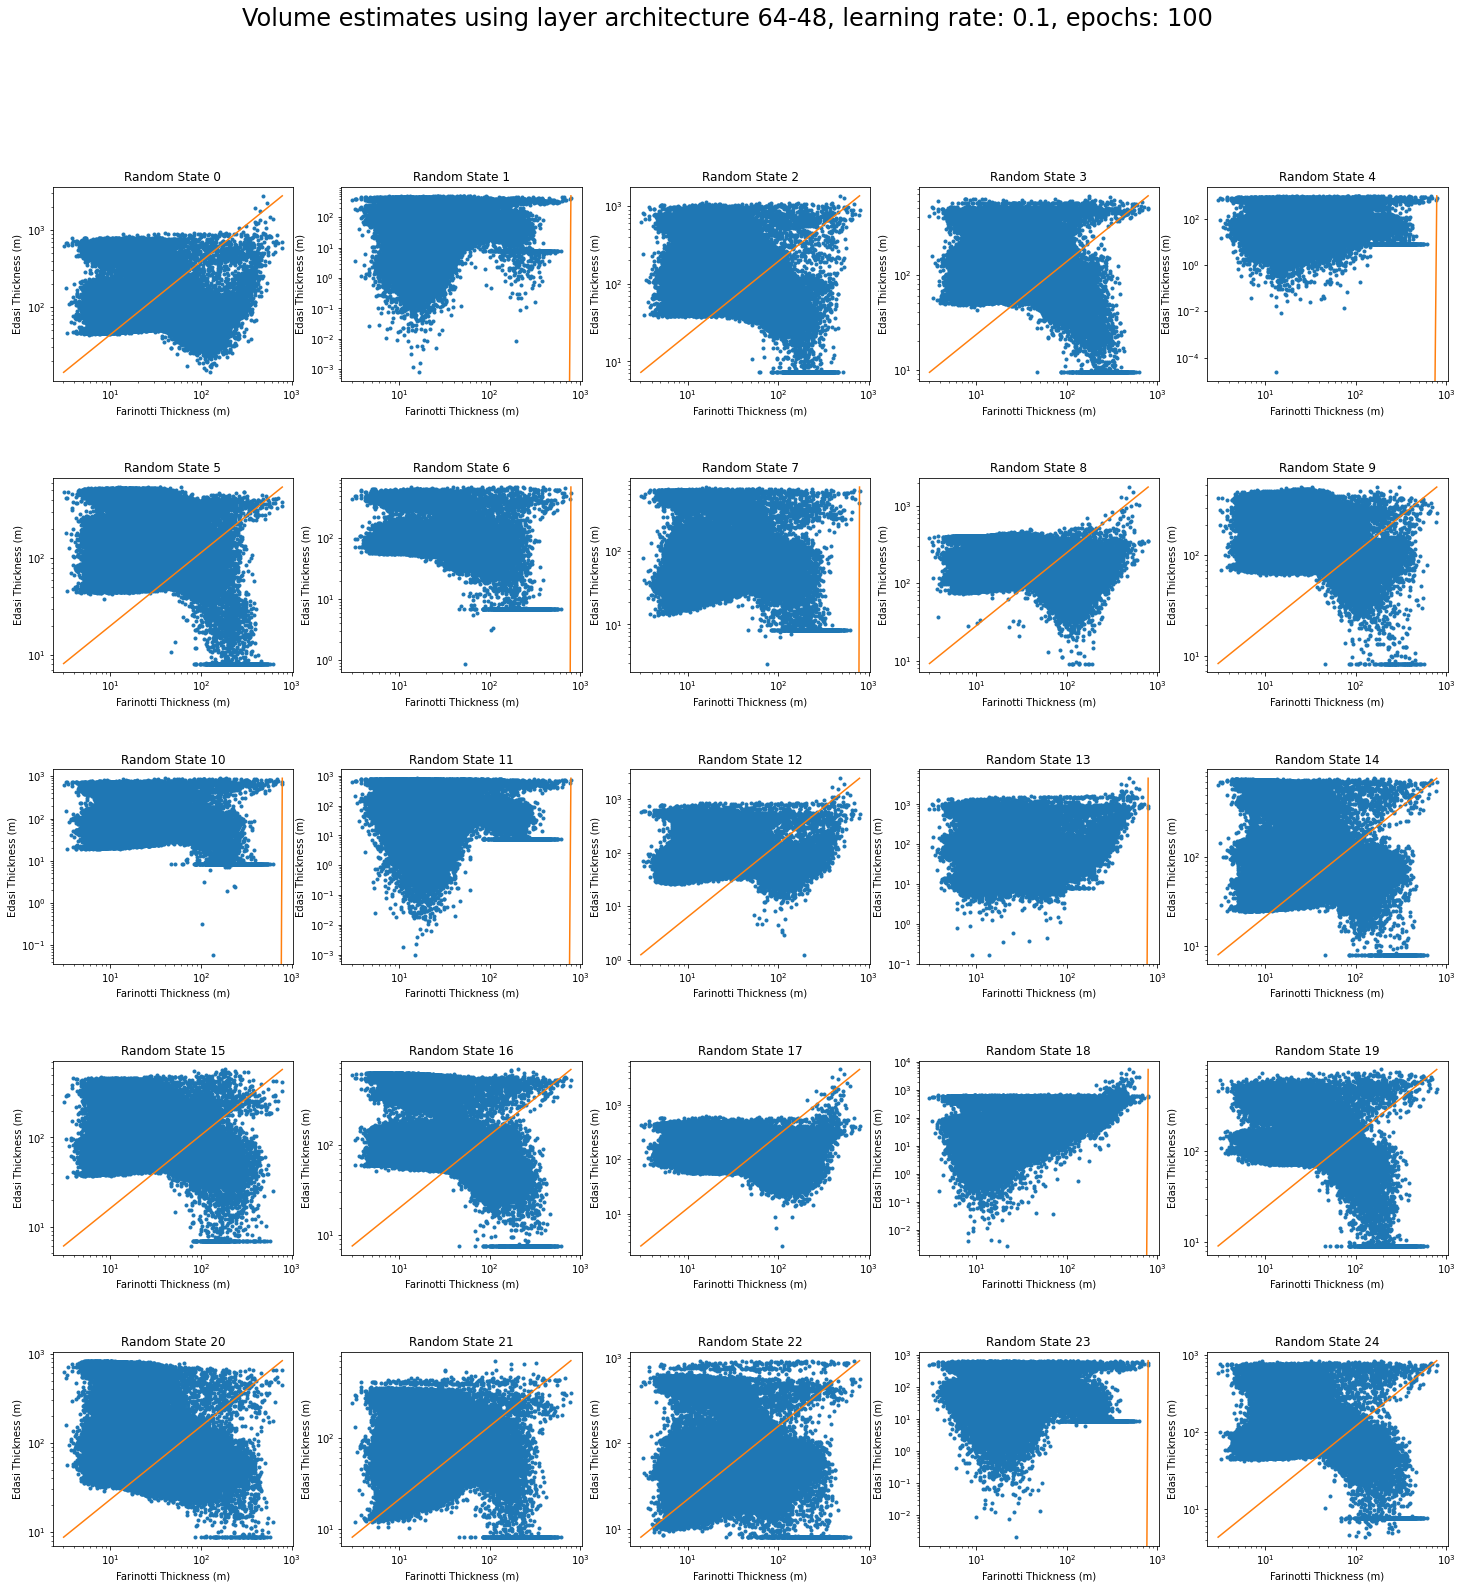

In [70]:
# RGI = RGI.drop('RGIId', axis = 1)

arch = '64-48'
top_learning_rate = 0.1
epochs = 100
dropout = 1

fig = plt.figure(figsize=(25, 25))
plt.subplots_adjust(hspace=0.5)
plt.suptitle(
    'Volume estimates using layer architecture ' + str(arch) +
    ', learning rate: ' + str(top_learning_rate) + ', epochs: ' + str(epochs)
             , fontsize=24, y=0.98
            )
fig.patch.set_facecolor('w')



df7 = gl.data_loader(
root_dir = '/home/simonhans/data/prethicktor/'
)
module = 'sm7'
res = 'sr7'
dataset = df7 
dataset.name = 'df7'
rootdir = 'saved_models/' + module + '/sm_' + str(arch) + '/'

dnn_model = {}
RS = range(0,25,1)
for n, rs in tqdm(enumerate(RS)):
    ax = plt.subplot(5, 5, n + 1)
    model_name = (
        str(arch) + 
        '_' + 
        dataset.name +
        '_' + 
        str(dropout) +
        '_dnn_MULTI_' + 
        str(top_learning_rate) + 
        '_0.2_' +
        str(epochs) + 
        '_' + 
        str(rs)
    )   
    
    model_path = (
        rootdir + 
        dataset.name +
        '_' + 
        str(dropout) +
        '_dnn_MULTI_' + 
        str(top_learning_rate) + 
        '_0.2_' +
        str(epochs) + 
        '_' + 
        str(rs)
    )
    
    
    
    dnn_model[model_name] = tf.keras.models.load_model(model_path)
    
    
    y = dnn_model[model_name].predict(RGI, verbose = 0)
    
    plt.plot(df['Farinotti Mean Thickness'],y,'.')
    plt.plot(
        (df['Farinotti Mean Thickness'].min(),df['Farinotti Mean Thickness'].max()),
        (y.min(),y.max()),
        '-'
    )    
    plt.xlabel('Farinotti Thickness (m)')
    plt.ylabel('Edasi Thickness (m)')
    ax.set_title('Random State ' +str(rs))
    plt.yscale('log')
    plt.xscale('log')
#     plt.xlim((0,400))
#     plt.ylim((0,400))
# plt.savefig('/home/simonhans/Desktop/test_fig.png')

In [107]:
df

,RGIId,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Farinotti Mean Thickness
0,RGI60-01.00001,63.6890,-146.8230,42.0,1936,2385,2725,0.360,346,839,22.540388
1,RGI60-01.00002,63.4040,-146.6680,16.0,1713,2005,2144,0.558,162,1197,39.607830
2,RGI60-01.00003,63.3760,-146.0800,18.0,1609,1868,2182,1.685,175,2106,40.248123
3,RGI60-01.00004,63.3810,-146.1200,19.0,1273,1944,2317,3.681,195,4175,55.180294
4,RGI60-01.00005,63.5510,-147.0570,16.0,1494,1914,2317,2.573,181,2981,47.715813
...,...,...,...,...,...,...,...,...,...,...,...
214805,RGI60-19.02748,-53.9860,-37.7325,29.9,310,-999,510,0.042,315,255,12.161269
214806,RGI60-19.02749,-54.8310,-36.1361,23.6,330,-999,830,0.567,200,1130,26.767542
214807,RGI60-19.02750,-54.1884,-37.3018,16.8,10,-999,1110,4.118,308,4329,58.965794
214808,RGI60-19.02751,-68.8656,-90.4266,0.4,170,-999,270,0.011,122,106,5.907545


In [ ]:

arch = '64-48'
top_learning_rate = 0.1
epochs = 100
dropout = 1

df7 = gl.data_loader(
root_dir = '/home/simonhans/data/prethicktor/'
)
module = 'sm7'
res = 'sr7'
dataset = df7 
dataset.name = 'df7'
rootdir = 'saved_models/' + module + '/sm_' + str(arch) + '/'


pth_2 = '/home/simonhans/data/prethicktor/RGI/rgi60-attribs/'
# pth_2 = '/data/fast1/glacierml/data/RGI/rgi60-attribs/'
RGI_extra = pd.DataFrame(columns = ['Farinotti Mean Thickness'])


for region_number in tqdm(range(1,20,1)):

#     print(RGI)
    if len(str(region_number)) == 1:
        N = 1
        region_number = str(region_number).zfill(N + len(str(region_number)))
    else:
        str(region_number) == str(region_number)
#     print(region_number)
    for file in (os.listdir(pth_2)):
#         print(file[:2])
        if str(file[:2]) == str(region_number):
#             print(str(file[:2]))
            RGI_region = pd.read_csv(pth_2 + file, encoding_errors = 'replace', on_bad_lines = 'skip')
    
    dft = df[df['RGIId'].str.contains('RGI60-' + str(region_number))]
    dft = dft[[
        'RGIId',
        'Farinotti Mean Thickness'
    ]]

    RGI_region = RGI_region[[
        'RGIId',
        'CenLat',
        'CenLon',
        'Slope',
        'Zmin',
        'Zmed',
        'Zmax',
        'Area',
        'Lmax',
        'Aspect',
    ]]

    region = pd.merge(dft, RGI_region, on = 'RGIId')
    region = region.dropna()

    
    
    
    RGI_for_predictions = region[[
        'CenLon',
        'CenLat',
        'Area',
        'Aspect',
        'Lmax',
        'Slope',
        'Zmax',
        'Zmed',
        'Zmin'
    ]]

    fig = plt.figure(figsize=(25, 25))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle(
        'Volume estimates using layer architecture ' + str(arch) +
        ', learning rate: ' + str(top_learning_rate) + ', epochs: ' + str(epochs) +
        '\n for region ' + str(region_number)
                 , fontsize=24, y=0.98
                )
    fig.patch.set_facecolor('w')
    
    

    dnn_model = {}
    RS = range(0,25,1)
    for n, rs in (enumerate(RS)):
        ax = plt.subplot(5, 5, n + 1)
        model_name = (
            str(arch) + 
            '_' + 
            dataset.name +
            '_' + 
            str(dropout) +
            '_dnn_MULTI_' + 
            str(top_learning_rate) + 
            '_0.2_' +
            str(epochs) + 
            '_' + 
            str(rs)
        )   

        model_path = (
            rootdir + 
            dataset.name +
            '_' + 
            str(dropout) +
            '_dnn_MULTI_' + 
            str(top_learning_rate) + 
            '_0.2_' +
            str(epochs) + 
            '_' + 
            str(rs)
        )



        dnn_model[model_name] = tf.keras.models.load_model(model_path)


        y = dnn_model[model_name].predict(RGI_for_predictions, verbose = 0)
        df = pd.concat([df, pd.Series(y.flatten(), name = rs)], axis = 1)
        plt.plot(region['Farinotti Mean Thickness'],y,'.')
        plt.plot(
            (df['Farinotti Mean Thickness'].min(),df['Farinotti Mean Thickness'].max()),
            (y.min(),y.max()),
            '-'
        )
        plt.xlabel('Farinotti Thickness (m)')
        plt.ylabel('Edasi Thickness (m)')
        ax.set_title('Random State ' +str(rs))
    #     plt.yscale('log')
    #     plt.xscale('log')
    #     plt.xlim((0,400))
    #     plt.ylim((0,400))
#     # plt.savefig('/home/simonhans/Desktop/test_fig.png')

 26%|██▋       | 5/19 [01:51<05:10, 22.18s/it]

In [102]:
RGI_region

,RGIId,Area,Aspect,Lmax,Slope,Zmax,Zmed,Zmin
0,RGI60-01.00001,0.360,346,839,42.0,2725,2385,1936
1,RGI60-01.00002,0.558,162,1197,16.0,2144,2005,1713
2,RGI60-01.00003,1.685,175,2106,18.0,2182,1868,1609
3,RGI60-01.00004,3.681,195,4175,19.0,2317,1944,1273
4,RGI60-01.00005,2.573,181,2981,16.0,2317,1914,1494
...,...,...,...,...,...,...,...,...
27103,RGI60-01.27108,534.228,174,72684,10.0,3238,403,3
27104,RGI60-01.27109,0.515,45,389,40.0,3034,2787,2448
27105,RGI60-01.27110,3.564,315,2048,23.5,1761,1511,980
27106,RGI60-01.27111,1.414,225,1011,27.1,1823,1595,1314


In [106]:
df

,RGIId,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Farinotti Mean Thickness
0,RGI60-01.00001,63.6890,-146.8230,42.0,1936,2385,2725,0.360,346,839,22.540388
1,RGI60-01.00002,63.4040,-146.6680,16.0,1713,2005,2144,0.558,162,1197,39.607830
2,RGI60-01.00003,63.3760,-146.0800,18.0,1609,1868,2182,1.685,175,2106,40.248123
3,RGI60-01.00004,63.3810,-146.1200,19.0,1273,1944,2317,3.681,195,4175,55.180294
4,RGI60-01.00005,63.5510,-147.0570,16.0,1494,1914,2317,2.573,181,2981,47.715813
...,...,...,...,...,...,...,...,...,...,...,...
214805,RGI60-19.02748,-53.9860,-37.7325,29.9,310,-999,510,0.042,315,255,12.161269
214806,RGI60-19.02749,-54.8310,-36.1361,23.6,330,-999,830,0.567,200,1130,26.767542
214807,RGI60-19.02750,-54.1884,-37.3018,16.8,10,-999,1110,4.118,308,4329,58.965794
214808,RGI60-19.02751,-68.8656,-90.4266,0.4,170,-999,270,0.011,122,106,5.907545


In [ ]:
df_copy = df.copy()

In [64]:
# df_copy = df_copy.drop(0, axis = 1)
# df = df.drop(df.columns[12], axis=1, inplace=True)
# df

# df['Edasi Mean Thickness'] = df.mean([[
#     '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
#     '10', '11', '12', '13', '14', '15', '16', '17', '18', '19'
#     '20', '21', '22', '23', '24'
# ]], axis=1)
df_y = df[[
    0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
]]
df['Edasi Mean Thickness'] = df_y.mean(axis = 1)
# df['Edasi Mean Thickness'] = df_y.mean(axis = 0)
# # len(df_y.isna())
# df = df[[
#     'RGIId'
#     'CenLat',
#     'CenLon',
#     'Slope',
#     'Zmin',
#     'Zmed',
#     'Zmax',
#     'Area',
#     'Aspect',
#     'Lmax',
#     'Farinotti Mean Thickness',
#     'Edasi Mean Thickness'
# ]]
df = df.dropna()
df_copy = df.copy()
df

,RGIId,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Farinotti Mean Thickness,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,Edasi Mean Thickness
0,RGI60-07.00001,76.7052,17.0347,16.7,142,268,459,0.597,204,1388,33.342789,88.960106,51.348671,64.451584,69.228722,113.204620,86.573792,82.462570,77.017548,158.356094,80.045738,82.540382,133.043991,89.807304,123.430779,67.176224,80.233307,74.354362,79.360611,14.924537,86.478378,60.091553,112.911804,39.397919,60.541931,79.855339,82.231911
1,RGI60-07.00002,76.7872,16.1891,18.3,234,343,582,0.581,277,1658,62.941624,82.492744,29.625528,54.007370,58.676971,86.176544,75.980820,69.886383,56.278538,157.904510,75.259659,71.373749,108.685570,88.908287,110.815079,57.008015,74.210220,70.211098,79.006104,12.243682,84.357964,44.337181,97.870346,26.762671,60.540104,78.592667,72.448471
2,RGI60-07.00003,76.9194,16.3915,19.8,157,330,540,0.388,222,1200,32.361950,89.643799,47.017067,62.527573,69.135414,101.328247,86.921097,80.327095,71.650452,165.441330,81.690018,78.104210,125.710594,90.198708,118.523979,63.533447,81.429527,75.570831,82.316330,15.484611,88.695541,57.098785,110.077011,37.769279,61.723553,78.213654,80.805275
3,RGI60-07.00004,76.9423,15.9932,13.8,665,799,933,1.044,62,1075,80.123192,125.455505,126.912086,96.491722,108.549927,130.798126,123.853638,87.116058,89.689034,197.559799,104.422066,113.313080,137.423935,80.453545,138.599167,85.521835,95.942970,85.602455,136.599915,76.877571,99.868782,111.918472,146.930466,83.955070,111.279160,92.605072,111.509583
4,RGI60-07.00005,76.9564,16.4966,17.7,186,263,396,0.500,35,1068,40.168793,104.838600,140.758377,113.647949,119.068825,177.724182,154.259567,116.653847,124.642548,191.408966,105.487366,116.331863,182.234650,96.777061,175.056137,102.142632,101.360725,86.742455,145.706406,70.565620,101.151337,135.844833,191.177475,82.027534,133.932800,103.947220,126.939560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105927,RGI60-18.03533,-43.4215,170.3540,34.7,1231,1724,2098,0.189,116,944,19.928921,358.598114,206.124741,474.178741,131.365662,529.301758,204.633072,340.978729,404.341156,183.461548,263.455078,329.998810,403.524414,359.257721,812.636475,269.179901,162.463943,281.172485,354.214447,307.125732,268.776520,285.348877,227.321854,408.886261,335.106110,239.606552,325.642273
105928,RGI60-18.03534,-43.4550,170.3490,36.1,1881,2106,2208,0.040,108,331,19.028547,380.323090,221.639236,483.401215,120.851433,569.713623,256.646820,379.136963,451.740021,155.173569,261.592346,356.935944,462.404327,416.004547,884.635742,316.752991,135.660446,354.482452,318.662415,336.533356,269.198639,242.669083,220.908203,509.412720,304.631958,313.396393,348.900299
105929,RGI60-18.03535,-43.4400,170.3510,39.2,1677,1974,2253,0.184,104,740,46.125809,348.293701,212.299240,466.084137,123.179314,535.925415,236.930405,353.003967,417.020996,163.789734,270.897034,332.549866,436.164520,370.949127,831.154053,273.964783,143.625092,319.030945,323.282166,315.805084,255.571777,253.004303,218.920303,452.805328,284.276031,261.973999,328.020050
105930,RGI60-18.03536,-43.4106,170.3640,34.0,1627,1839,1928,0.111,135,406,25.236313,442.500214,218.936768,540.410950,125.368126,597.359680,236.541748,395.945099,476.158264,152.719360,271.985382,413.689240,467.078522,455.976898,937.927063,362.804504,148.430267,347.022583,357.052002,378.674438,316.874817,343.344513,234.207382,531.723083,409.479889,349.017731,380.449097


In [26]:
temp_df = df_copy.loc[df_copy['RGIId'].str.contains('RGI60-03')]
temp_df['Farinotti Mean Thickness'].mean()

70.4480040401408

                 RGIId   CenLat    CenLon  Slope  Zmin  Zmed  Zmax   Area  \
0       RGI60-01.00001  63.6890 -146.8230   42.0  1936  2385  2725  0.360   
1       RGI60-01.00002  63.4040 -146.6680   16.0  1713  2005  2144  0.558   
2       RGI60-01.00003  63.3760 -146.0800   18.0  1609  1868  2182  1.685   
3       RGI60-01.00004  63.3810 -146.1200   19.0  1273  1944  2317  3.681   
4       RGI60-01.00005  63.5510 -147.0570   16.0  1494  1914  2317  2.573   
...                ...      ...       ...    ...   ...   ...   ...    ...   
216496  RGI60-19.02748 -53.9860  -37.7325   29.9   310  -999   510  0.042   
216497  RGI60-19.02749 -54.8310  -36.1361   23.6   330  -999   830  0.567   
216498  RGI60-19.02750 -54.1884  -37.3018   16.8    10  -999  1110  4.118   
216499  RGI60-19.02751 -68.8656  -90.4266    0.4   170  -999   270  0.011   
216500  RGI60-19.02752 -46.8972   37.7140    9.6   970  -999  1170  0.528   

        Aspect  
0          346  
1          162  
2          175  
3      

  0%|          | 0/19 [00:00<?, ?it/s]


ValueError: could not convert string to float: 'RGI60-01.00001'

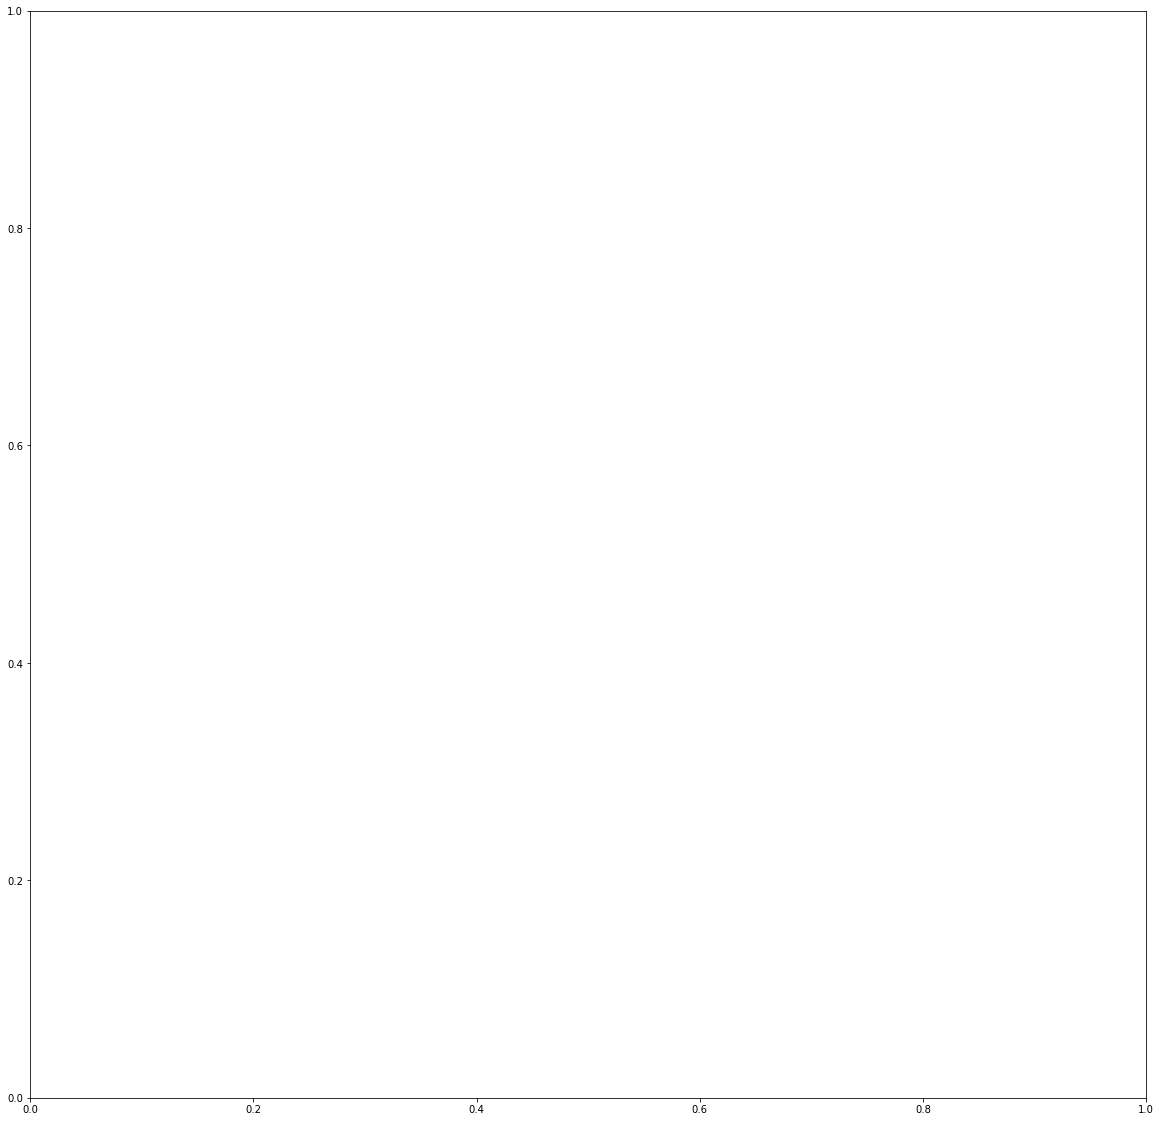

In [27]:
#### KMeans elbow plot for RGI at fegion scale 

dft = df[[
    'CenLat',
    'CenLon',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Area',
    'Aspect',
    'Lmax',
#     'Farinotti Mean Thickness',
#     'Edasi Mean Thickness'
]]
fig, ax = plt.subplots(1, 1, figsize = (20,20))
plt.subplots_adjust(hspace=0.5)
fig.patch.set_facecolor('w')
# ELBOW PLOT START

x = df.iloc[:,[0,1,2,3,4,5,6,7,8]]
print(x)
distortions = []
K = range(1,20)
for k in tqdm(K):
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(x)
    distortions.append(kmeanModel.inertia_)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.suptitle(
    'The Elbow Method showing the optimal clusters', 
    fontsize=18, y=0.95)

# ELBOW PLOT END

plt.show()    

In [30]:
df = df.dropna()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


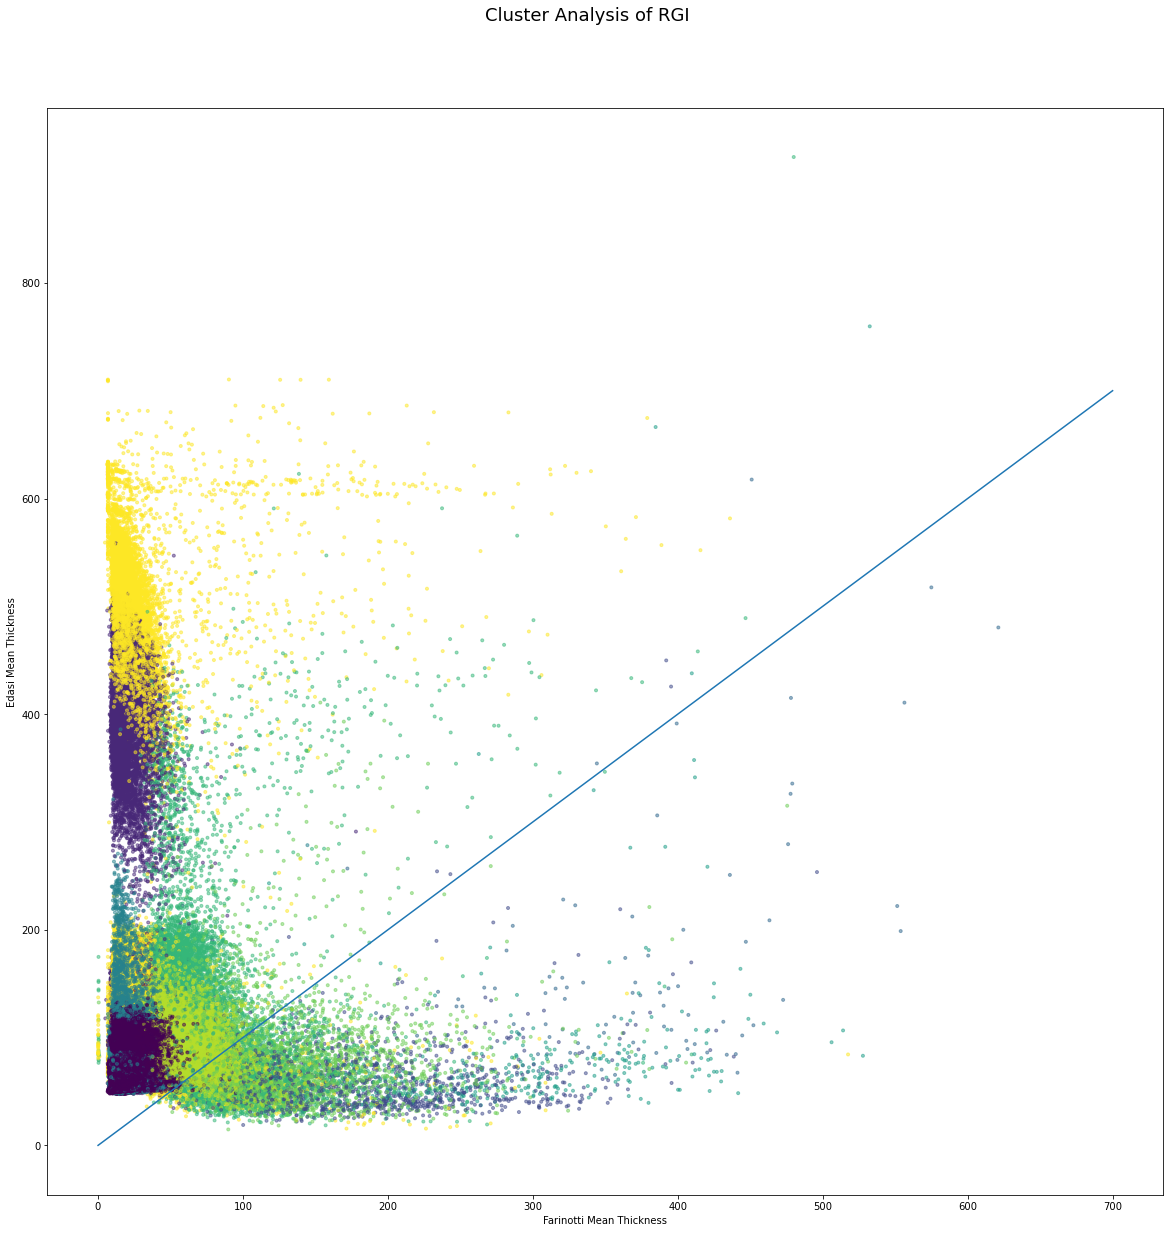

In [35]:

kmeans = KMeans(n_clusters = 10, random_state = 0)
dft = df[[
    'CenLat',
    'CenLon',
    'Area',
    'Aspect',
    'Lmax',
    'Slope',
    'Zmin',
    'Zmax'
]]
df['cluster'] = kmeans.fit_predict(dft)
# print(len(km_y))
fig, ax = plt.subplots(1, 1, figsize = (20,20))
fig.patch.set_facecolor('w')
plt.suptitle(
    'Cluster Analysis of RGI',
    fontsize=18, y=0.95
)

plt.scatter(
    df['Farinotti Mean Thickness'],
    df['Edasi Mean Thickness'],
    c = df['cluster'],
    label = df['cluster'],
    cmap = 'viridis',
    alpha = 0.5,
    marker = '.'
)
plt.plot(
    (0,700),
    (0,700),
    '-'
)
# ax.set_xlim(0, 700)
# ax.set_ylim(0, 700)

ax.set_xlabel('Farinotti Mean Thickness')
ax.set_ylabel('Edasi Mean Thickness')
# plt.xscale('log')
# plt.yscale('log')
# plt.legend()
plt.savefig('figs/RGI_volume_comparison_cluster.eps')
plt.savefig('figs/RGI_volume_comparison_cluster.png')

In [31]:
df

,RGIId,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Farinotti Mean Thickness,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,Edasi Mean Thickness
0,RGI60-01.00001,63.6890,-146.8230,42.0,1936,2385,2725,0.360,346,839,21.182035,133.743576,65.906075,190.439346,120.717514,49.128605,103.285393,80.855927,58.191406,279.284332,131.241898,80.187706,41.679176,62.702217,18.857281,86.960655,71.950279,76.061592,115.408905,41.106541,121.430687,75.859856,74.908035,117.032722,66.100189,96.496017,94.381447
1,RGI60-01.00002,63.4040,-146.6680,16.0,1713,2005,2144,0.558,162,1197,30.519478,176.193085,151.647766,281.340973,149.383514,72.661102,139.413330,95.964050,61.353081,270.802734,179.184723,146.253250,99.186134,72.570168,71.435982,94.819977,101.724304,84.552528,199.793854,61.607975,137.484421,86.596870,121.663979,116.422089,109.068214,107.222221,127.533859
2,RGI60-01.00003,63.3760,-146.0800,18.0,1609,1868,2182,1.685,175,2106,35.518610,179.917847,137.263748,257.428741,146.197342,73.102676,132.553696,98.178970,62.164837,248.119461,166.785324,153.701462,79.310112,73.399155,70.592964,88.732491,102.163376,79.798904,190.472168,67.057259,130.677200,86.043861,129.311157,129.487549,97.503654,103.324852,123.331573
3,RGI60-01.00004,63.3810,-146.1200,19.0,1273,1944,2317,3.681,195,4175,53.077263,173.203568,132.060928,217.758911,159.612534,102.565491,136.123260,133.341797,91.126060,262.517578,182.716171,174.607819,111.038368,93.820427,86.814262,93.386414,120.688400,82.423737,166.318176,110.498131,141.342438,118.744644,162.098221,134.110962,95.119286,124.507736,136.261826
4,RGI60-01.00005,63.5510,-147.0570,16.0,1494,1914,2317,2.573,181,2981,47.519207,186.477585,135.774338,244.068817,154.891006,81.657379,134.379791,112.178284,73.260536,252.095688,174.088318,166.455933,93.626961,82.458145,78.393486,91.343391,111.060829,81.441719,181.338608,80.699074,136.889297,99.929779,142.153793,134.012283,94.211205,112.954582,129.433624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216496,RGI60-19.02748,-53.9860,-37.7325,29.9,310,-999,510,0.042,315,255,12.948014,579.778320,309.391876,659.752197,453.111420,647.220642,373.600769,415.271118,410.893585,247.417801,269.964020,651.077576,587.470825,513.137573,919.347290,573.357849,182.915787,469.682281,367.471588,438.505188,503.531464,423.823822,208.743149,437.870544,446.931793,635.621399,469.035583
216497,RGI60-19.02749,-54.8310,-36.1361,23.6,330,-999,830,0.567,200,1130,22.894110,505.545868,313.970734,611.719238,432.821533,587.273376,339.306366,368.101990,383.726105,276.582153,236.461441,553.555176,534.180969,412.704926,781.933472,493.258911,235.076248,399.235809,324.935699,430.232666,445.696625,419.679718,201.650284,374.331696,426.743256,529.360291,424.723389
216498,RGI60-19.02750,-54.1884,-37.3018,16.8,10,-999,1110,4.118,308,4329,60.874610,285.498810,263.203735,440.657928,374.138733,396.796478,307.878357,245.277328,120.987350,268.325409,245.931763,399.029877,280.254700,219.132004,569.831482,265.461121,156.157104,284.771454,226.157639,226.922882,419.151703,84.965637,121.143860,180.867035,314.114136,340.002655,281.466400
216499,RGI60-19.02751,-68.8656,-90.4266,0.4,170,-999,270,0.011,122,106,10.053704,687.786560,449.279388,850.804504,500.245087,787.482178,428.216095,530.148376,621.515808,390.295319,292.147888,769.310730,722.143311,540.634216,904.137329,689.874268,384.231506,535.647461,379.553436,629.166626,529.808044,619.632080,296.348236,509.836273,565.991089,742.367065,574.264099


In [ ]:
df

In [14]:
df['Farinotti Mean Thickness'].mean()

28.243614250235126

<AxesSubplot:xlabel='Farinotti Mean Thickness', ylabel='Edasi Mean Thickness'>

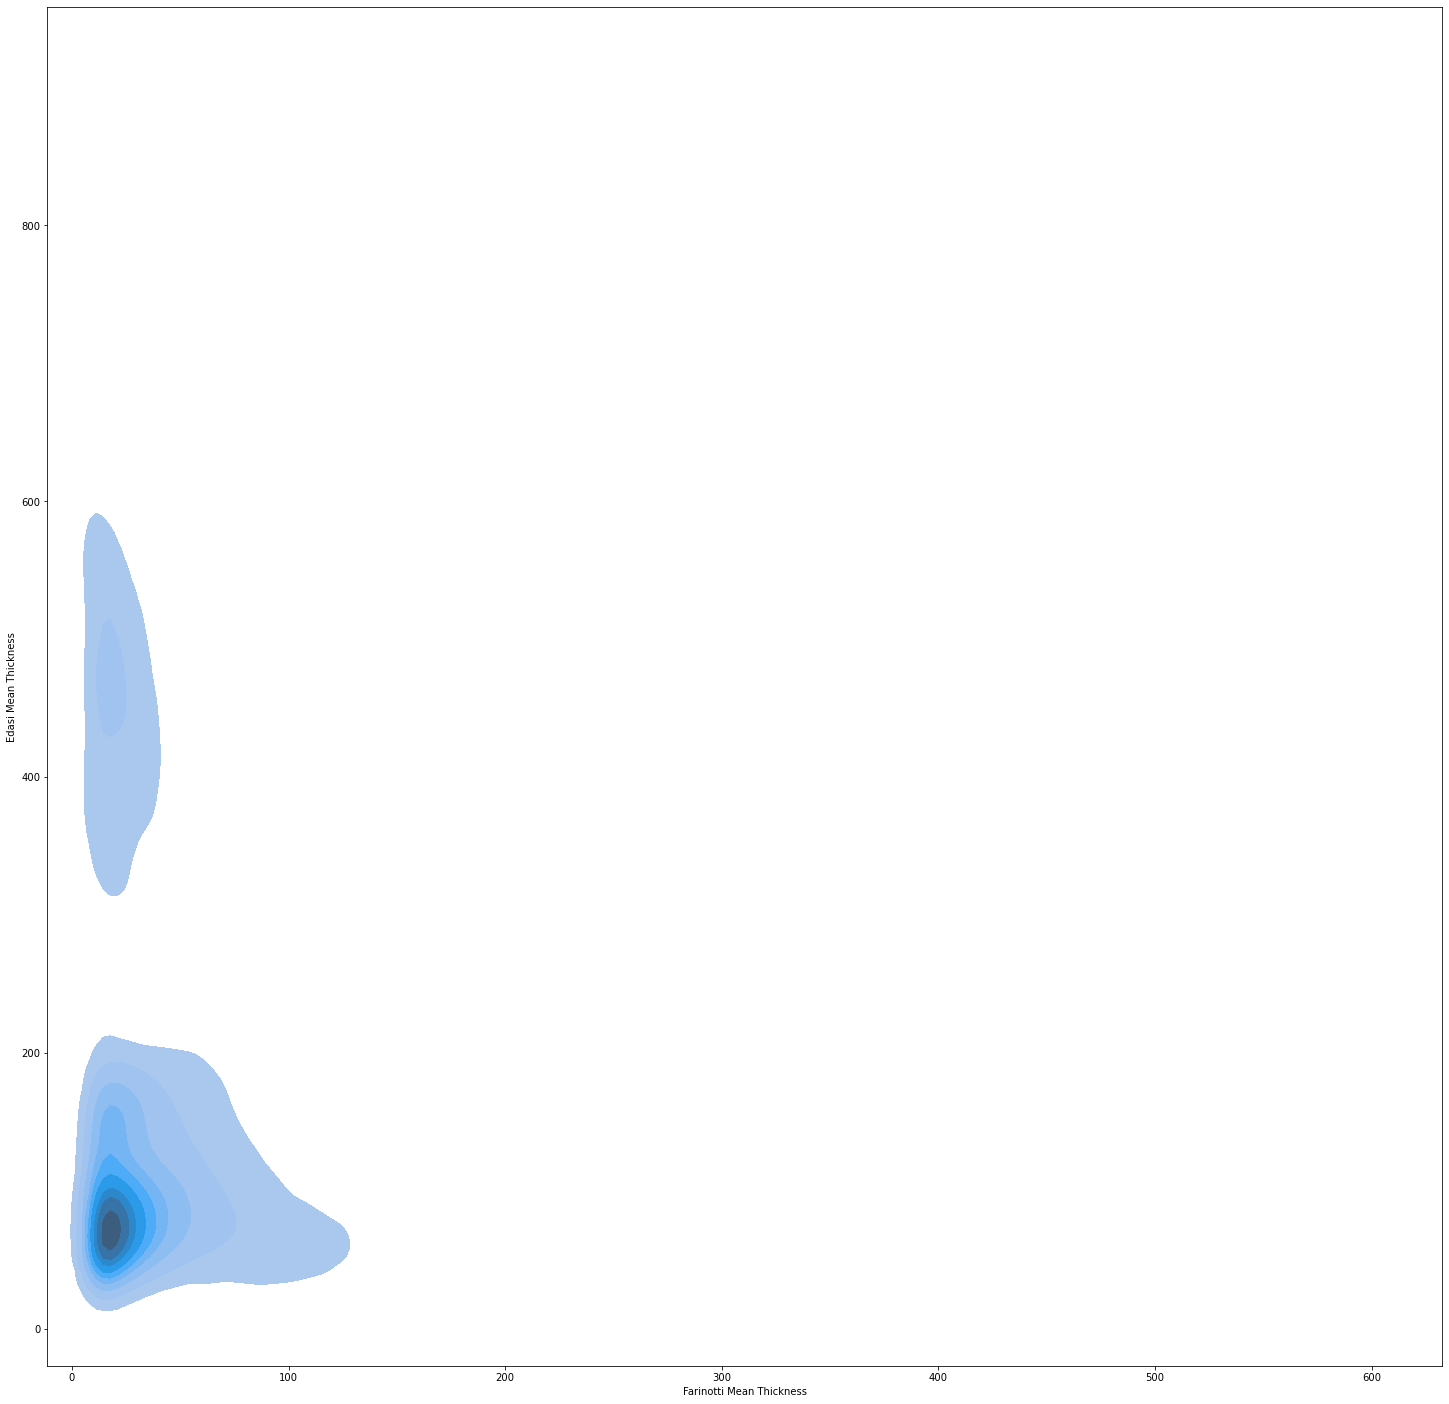

In [28]:
fig = plt.figure(figsize=(25, 25))
plt.subplots_adjust(hspace=0.5)
# plt.suptitle(
#     'Volume estimates using layer architecture ' + str(arch) +
#     ', learning rate: ' + str(top_learning_rate) + ', epochs: ' + str(epochs)
#              , fontsize=24, y=0.98
#             )
fig.patch.set_facecolor('w')

ax.set_xlim(0, 600)
ax.set_ylim(0, 600)

sns.kdeplot(
    x = df['Farinotti Mean Thickness'], 
    y = df['Edasi Mean Thickness'],
    fill = True
)


In [15]:
df['Edasi Mean Thickness'].mean()

120.37203

In [ ]:
# fold here
dft_list = [
    'Area',
    'Aspect',
    'Lmax',
    'Slope',
    'Zmin',
    'Zmax'
]

for attribute in dft_list:
    

    fig, ax = plt.subplots(1, 1, figsize = (20,20))
    fig.patch.set_facecolor('w')
    plt.suptitle(
        'Cluster Analysis of RGI ' + attribute + 
        ' against RGI Attribute', 
        fontsize=18, y=0.95
    )

    for n, att in enumerate(dft_list):
        ax = plt.subplot(3,2,n+1)

        plt.scatter(
            df[attribute],
            df[att],
            c = df['cluster'], 
            cmap = 'viridis',
            alpha = 0.5, 
            marker = '.'

        )
        if attribute == 'Area' or 'Lmax':
            plt.xscale('log')
        if att == 'Area' or 'Lmax':
            plt.yscale('log')
        ax.set_xlabel('RGI ' + attribute)
        ax.set_ylabel('RGI '+ att)
        ax.set_title('RGI ' + attribute )


#         for i in df.index:
#             plt.text(
#                 x = dft[attribute].loc[i] + 0.02,
#                 y = (
#                     dft[att].loc[i]) + 0.02,
#                 s = df['dataframe'].str[4:].loc[i] + '-' + str(dft[stat].loc[i])
#             )

In [ ]:
df.sort_values('Edasi Mean Thickness')

In [ ]:
y.max()